In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# Loading dataset
df = pd.read_csv('data.csv')
print(df.head())
print(df.info())
print(df.describe())

# Handling missing values (if any)
df = df.dropna()

# Selecting features and target
X = df[['Square_Feet']]
y = df['Price']

# Adding bias (intercept) term
X = np.hstack((np.ones((X.shape[0], 1)), X.values.reshape(-1, 1)))
y = y.values.reshape(-1, 1)


   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030           1.0            3.0         3.0      1967.0   
1   2   287.678577           1.0            2.0         1.0      1949.0   
2   3   232.998485           1.0            3.0         2.0      1923.0   
3   4   199.664621           5.0            2.0         2.0      1918.0   
4   5    89.004660           4.0            3.0         3.0      1999.0   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0         1.0       1.0         48.0        8.297631            5.935734   
1         0.0       1.0         37.0        6.061466           10.827392   
2         1.0       0.0         14.0        2.911442            6.904599   
3         0.0       0.0         17.0        2.070949            8.284019   
4         1.0       0.0         34.0        1.523278           14.648277   

   Price  
0   6021  
1   5914  
2   4645  
3   5831  
4   6199  
<class 'pandas.core.frame.

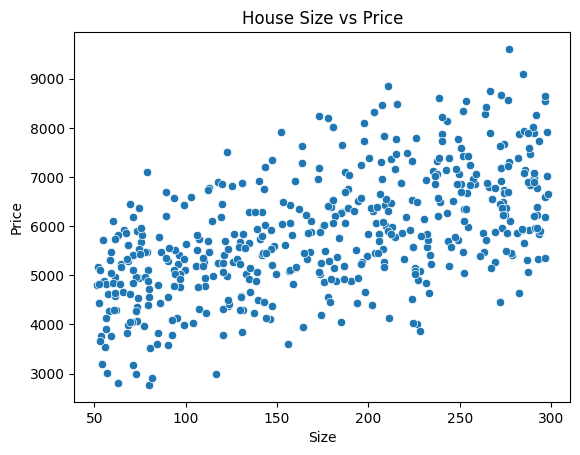

In [36]:
# Visualizing the relationship
sns.scatterplot(x=df['Square_Feet'], y=df['Price'])
plt.title('House Size vs Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()


In [ ]:
def linear_regression(X, y):
    XtX_inv = np.linalg.inv(X.T @ X)
    theta = XtX_inv @ X.T @ y
    return theta

theta = linear_regression(X, y)
print("Learned coefficients (theta):", theta.ravel())


Learned coefficients (theta): [4199.51188046    9.37157004]


In [ ]:
# Predictions
y_pred = X @ theta

# Mean Squared Error (MSE)
mse = np.mean((y - y_pred)**2)

# Residual Sum of Squares (RSS)
rss = np.sum((y - y_pred)**2)

print(f"MSE: {mse:.4f}")
print(f"RSS: {rss:.4f}")


MSE: 1011946.8865
RSS: 475615036.6752


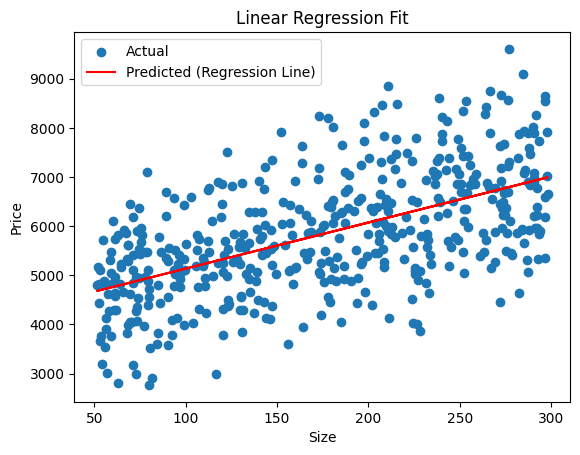

In [ ]:
plt.scatter(X[:, 1], y, label='Actual')
plt.plot(X[:, 1], y_pred, color='red', label='Predicted (Regression Line)')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df[['Square_Feet']])
X_std = np.hstack((np.ones((X_std.shape[0], 1)), X_std))
theta_std = linear_regression(X_std, y)
y_pred_std = X_std @ theta_std

mse_std = np.mean((y - y_pred_std)**2)
rss_std = np.sum((y - y_pred_std)**2)

print(f"[Standardized] MSE: {mse_std:.4f}")
print(f"[Standardized] RSS: {rss_std:.4f}")


[Standardized] MSE: 1011946.8865
[Standardized] RSS: 475615036.6752


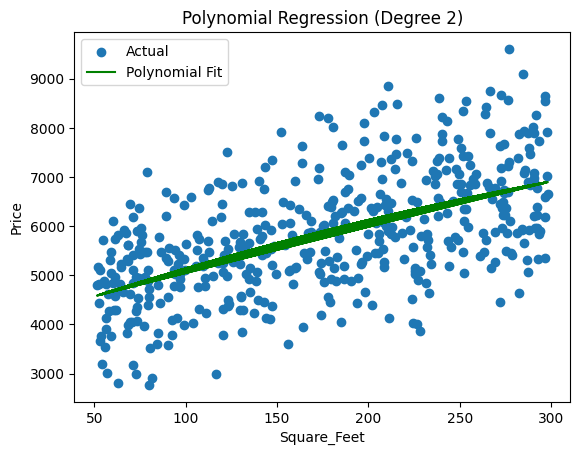

In [37]:
# Adding polynomial term (size^2)
X_poly = np.hstack((np.ones((X.shape[0], 1)), df[['Square_Feet']], df[['Square_Feet']]**2))
theta_poly = linear_regression(X_poly, y)
y_pred_poly = X_poly @ theta_poly

# Visualizing
plt.scatter(df['Square_Feet'], y, label='Actual')
plt.plot(df['Square_Feet'], y_pred_poly, color='green', label='Polynomial Fit')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()
